In [472]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

inisialise data

In [474]:
#Read Data From Dataset
datas = pd.read_csv('HousePrice.csv')

In [475]:
del datas["Price(USD)"]

In [476]:
datas

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1.850000e+09
1,60,1,True,True,True,Shahran,1.850000e+09
2,79,2,True,True,True,Pardis,5.500000e+08
3,95,2,True,True,True,Shahrake Qods,9.025000e+08
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09
3475,83,2,True,True,True,Niavaran,6.800000e+09
3476,75,2,False,False,False,Parand,3.650000e+08
3477,105,2,True,True,True,Dorous,5.600000e+09


In [477]:
#separate the target data
Y_All = datas["Price"]

In [478]:
del datas["Price"]

In [479]:
X_All = datas

In [480]:
X_All

,Area,Room,Parking,Warehouse,Elevator,Address
0,63,1,True,True,True,Shahran
1,60,1,True,True,True,Shahran
2,79,2,True,True,True,Pardis
3,95,2,True,True,True,Shahrake Qods
4,123,2,True,True,True,Shahrake Gharb
...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad
3475,83,2,True,True,True,Niavaran
3476,75,2,False,False,False,Parand
3477,105,2,True,True,True,Dorous


Convert DATA To Int for begin for convert to tensor

In [481]:
def replace_datas(x):
    if x == True:
        return 1
    elif x == False : 
        return 0

X_All["Parking"] = X_All["Parking"].apply(replace_datas)
X_All["Warehouse"] = X_All["Warehouse"].apply(replace_datas)
X_All["Elevator"] = X_All["Elevator"].apply(replace_datas)

In [485]:
mem = []
def replace_Addres(x):
    if x in mem:
        return mem.index(x)
    else:
        mem.append(x)
        return mem.index(x)

X_All["Address"] = X_All["Address"].apply(replace_Addres)

In [486]:
for i in mem:
    print(i,mem.index(i))

Shahran 0
Pardis 1
Shahrake Qods 2
Shahrake Gharb 3
North Program Organization 4
Andisheh 5
West Ferdows Boulevard 6
Narmak 7
Saadat Abad 8
Zafar 9
Islamshahr 10
Pirouzi 11
Shahrake Shahid Bagheri 12
Moniriyeh 13
Velenjak 14
Amirieh 15
Southern Janatabad 16
Salsabil 17
Zargandeh 18
Feiz Garden 19
Water Organization 20
nan 21
ShahrAra 22
Gisha 23
Ray 24
Abbasabad 25
Ostad Moein 26
Farmanieh 27
Parand 28
Punak 29
Qasr-od-Dasht 30
Aqdasieh 31
Pakdasht 32
Railway 33
Central Janatabad 34
East Ferdows Boulevard 35
Pakdasht KhatunAbad 36
Sattarkhan 37
Baghestan 38
Shahryar 39
Northern Janatabad 40
Daryan No 41
Southern Program Organization 42
Rudhen 43
West Pars 44
Afsarieh 45
Marzdaran 46
Dorous 47
Sadeghieh 48
Chahardangeh 49
Baqershahr 50
Jeyhoon 51
Lavizan 52
Shams Abad 53
Fatemi 54
Keshavarz Boulevard 55
Kahrizak 56
Qarchak 57
Northren Jamalzadeh 58
Azarbaijan 59
Bahar 60
Persian Gulf Martyrs Lake 61
Beryanak 62
Heshmatieh 63
Elm-o-Sanat 64
Golestan 65
Shahr-e-Ziba 66
Pasdaran 67
Chardiv

In [487]:
X_All["Address"] = X_All["Address"].apply(lambda x:x/192)

In [488]:
X_All["Area"] = X_All["Area"].apply(lambda x:int(str(x).replace(",","")))

In [489]:
X_All["Area"] = X_All["Area"].apply(lambda x:300 if x > 1000 else x)

In [490]:
X_All["Room"] = X_All["Room"].apply(lambda x:x/5)

In [491]:
X_All["Area"] = X_All["Area"].apply(lambda x:x/1000)

<Axes: >

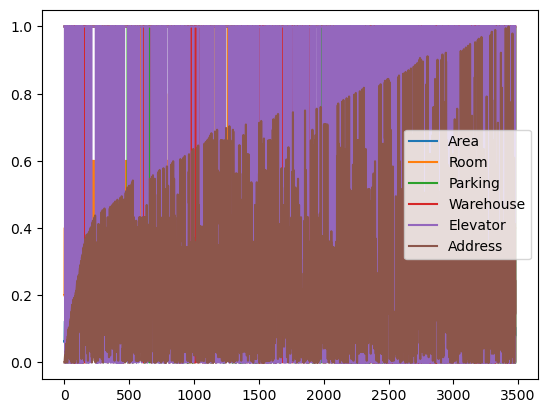

In [492]:
X_All.plot()

<Axes: >

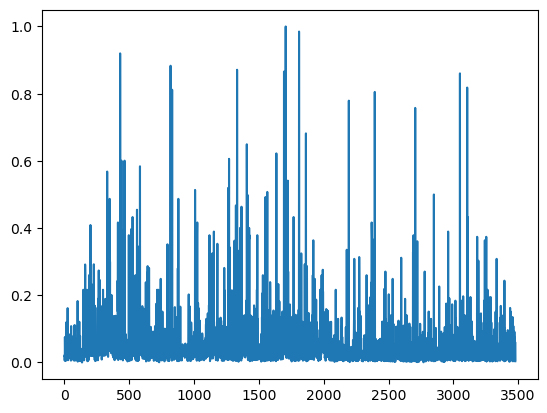

In [495]:
Y_All.plot()

In [494]:
Y_All = Y_All.apply(lambda x:x/9.24e10)

In [496]:
####################################################################################################

split test data and train data

In [497]:
(x_train,y_train),(x_test,y_test) = (X_All[:3000],Y_All[:3000]),(X_All[3000:],Y_All[3000:])

In [ ]:
Convet DATA to tensors

In [500]:
(x_train,y_train),(x_test,y_test) = (tf.convert_to_tensor(x_train),tf.convert_to_tensor(y_train)),(tf.convert_to_tensor(x_test),tf.convert_to_tensor(y_test))

In [501]:
x_train

<tf.Tensor: shape=(3000, 6), dtype=float64, numpy=
array([[0.063     , 0.2       , 1.        , 1.        , 1.        ,
        0.        ],
       [0.06      , 0.2       , 1.        , 1.        , 1.        ,
        0.        ],
       [0.079     , 0.4       , 1.        , 1.        , 1.        ,
        0.00520833],
       ...,
       [0.136     , 0.6       , 1.        , 1.        , 1.        ,
        0.25      ],
       [0.068     , 0.4       , 0.        , 1.        , 0.        ,
        0.16666667],
       [0.055     , 0.2       , 0.        , 1.        , 1.        ,
        0.61979167]])>

In [507]:
model = tf.keras.Sequential(layers=[
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(100,activation="relu"),
     tf.keras.layers.Dense(1),
])

In [509]:
model.compile(loss = tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["mae"])

In [510]:
history = model.fit(x_train,y_train,validation_split=0.2, epochs=100)

Epoch 1/100
75/75 [==============================] - 21s 268ms/step - loss: 0.0702 - mae: 0.0702 - val_loss: 0.0216 - val_mae: 0.0216
Epoch 2/100
75/75 [==============================] - 20s 261ms/step - loss: 0.0457 - mae: 0.0457 - val_loss: 0.0255 - val_mae: 0.0255
Epoch 3/100
75/75 [==============================] - 20s 261ms/step - loss: 0.0394 - mae: 0.0394 - val_loss: 0.0325 - val_mae: 0.0325
Epoch 4/100
75/75 [==============================] - 20s 262ms/step - loss: 0.0380 - mae: 0.0380 - val_loss: 0.0233 - val_mae: 0.0233
Epoch 5/100
75/75 [==============================] - 20s 266ms/step - loss: 0.0353 - mae: 0.0353 - val_loss: 0.0223 - val_mae: 0.0223
Epoch 6/100
75/75 [==============================] - 20s 265ms/step - loss: 0.0315 - mae: 0.0315 - val_loss: 0.0219 - val_mae: 0.0219
Epoch 7/100
75/75 [==============================] - 23s 304ms/step - loss: 0.0312 - mae: 0.0312 - val_loss: 0.0226 - val_mae: 0.0226
Epoch 8/100
75/75 [==============================] - 26s 342ms

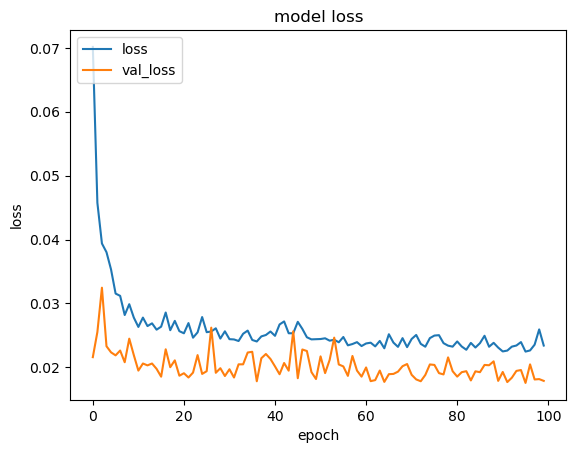

In [530]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

"""
    Shahran 0
    Pardis 1
    Shahrake Qods 2
    Shahrake Gharb 3
    North Program Organization 4
    Andisheh 5
    West Ferdows Boulevard 6
    Narmak 7
    Saadat Abad 8
    Zafar 9
    Islamshahr 10
    Pirouzi 11
    Shahrake Shahid Bagheri 12
    Moniriyeh 13
    Velenjak 14
    Amirieh 15
    Southern Janatabad 16
    Salsabil 17
    Zargandeh 18
    Feiz Garden 19
    Water Organization 20
    nan 21
    ShahrAra 22
    Gisha 23
    Ray 24
    Abbasabad 25
    Ostad Moein 26
    Farmanieh 27
    Parand 28
    Punak 29
    Qasr-od-Dasht 30
    Aqdasieh 31
    Pakdasht 32
    Railway 33
    Central Janatabad 34
    East Ferdows Boulevard 35
    Pakdasht KhatunAbad 36
    Sattarkhan 37
    Baghestan 38
    Shahryar 39
    Northern Janatabad 40
    Daryan No 41
    Southern Program Organization 42
    Rudhen 43
    West Pars 44
    Afsarieh 45
    Marzdaran 46
    Dorous 47
    Sadeghieh 48
    Chahardangeh 49
    Baqershahr 50
    Jeyhoon 51
    Lavizan 52
    Shams Abad 53
    Fatemi 54
    Keshavarz Boulevard 55
    Kahrizak 56
    Qarchak 57
    Northren Jamalzadeh 58
    Azarbaijan 59
    Bahar 60
    Persian Gulf Martyrs Lake 61
    Beryanak 62
    Heshmatieh 63
    Elm-o-Sanat 64
    Golestan 65
    Shahr-e-Ziba 66
    Pasdaran 67
    Chardivari 68
    Gheitarieh 69
    Kamranieh 70
    Gholhak 71
    Heravi 72
    Hashemi 73
    Dehkade Olampic 74
    Damavand 75
    Republic 76
    Zaferanieh 77
    Qazvin Imamzadeh Hassan 78
    Niavaran 79
    Valiasr 80
    Qalandari 81
    Amir Bahador 82
    Ekhtiarieh 83
    Ekbatan 84
    Absard 85
    Haft Tir 86
    Mahallati 87
    Ozgol 88
    Tajrish 89
    Abazar 90
    Koohsar 91
    Hekmat 92
    Parastar 93
    Lavasan 94
    Majidieh 95
    Southern Chitgar 96
    Karimkhan 97
    Si Metri Ji 98
    Karoon 99
    Northern Chitgar 100
    East Pars 101
    Kook 102
    Air force 103
    Sohanak 104
    Komeil 105
    Azadshahr 106
    Zibadasht 107
    Amirabad 108
    Dezashib 109
    Elahieh 110
    Mirdamad 111
    Razi 112
    Jordan 113
    Mahmoudieh 114
    Shahedshahr 115
    Yaftabad 116
    Mehran 117
    Nasim Shahr 118
    Tenant 119
    Chardangeh 120
    Fallah 121
    Eskandari 122
    Shahrakeh Naft 123
    Ajudaniye 124
    Tehransar 125
    Nawab 126
    Yousef Abad 127
    Northern Suhrawardi 128
    Villa 129
    Hakimiyeh 130
    Nezamabad 131
    Garden of Saba 132
    Tarasht 133
    Azari 134
    Shahrake Apadana 135
    Araj 136
    Vahidieh 137
    Malard 138
    Shahrake Azadi 139
    Darband 140
    Vanak 141
    Tehran Now 142
    Darabad 143
    Eram 144
    Atabak 145
    Sabalan 146
    SabaShahr 147
    Shahrake Madaen 148
    Waterfall 149
    Ahang 150
    Salehabad 151
    Pishva 152
    Enghelab 153
    Islamshahr Elahieh 154
    Ray - Montazeri 155
    Firoozkooh Kuhsar 156
    Ghoba 157
    Mehrabad 158
    Southern Suhrawardi 159
    Abuzar 160
    Dolatabad 161
    Hor Square 162
    Taslihat 163
    Kazemabad 164
    Robat Karim 165
    Ray - Pilgosh 166
    Ghiyamdasht 167
    Telecommunication 168
    Mirza Shirazi 169
    Gandhi 170
    Argentina 171
    Seyed Khandan 172
    Shahrake Quds 173
    Safadasht 174
    Khademabad Garden 175
    Hassan Abad 176
    Chidz 177
    Khavaran 178
    Boloorsazi 179
    Mehrabad River River 180
    Varamin - Beheshti 181
    Shoosh 182
    Thirteen November 183
    Darakeh 184
    Aliabad South 185
    Alborz Complex 186
    Firoozkooh 187
    Vahidiyeh 188
    Shadabad 189
    Naziabad 190
    Javadiyeh 191
    Yakhchiabad 192
    """

make a function to use easily model

In [419]:
def use_model(Area,Room,Parking,Warehouse,Elevator,Address):  
    answer = model.predict([[Area/1000,Room/5,int(Parking),int(Warehouse),int(Elevator),Address]])[0][0]
    if answer < 0:
        return answer * -9.24e10
    else:
        return answer * 9.24e10
    